**Полоников Никита**

# Дз №1 BigData

In [1]:
!ls

HW 1. Bash. Hadoop. MapReduce.-2.ipynb	income.csv  shakespeare.txt
hw_map_reduce.ipynb			logs.csv


In [2]:
!hdfs dfs -mkdir /input

In [3]:
!hdfs dfs -ls /

Found 1 items
drwxr-xr-x   - root supergroup          0 2024-06-10 22:09 /input


In [4]:
!hdfs dfs -ls /input

In [5]:
!hdfs dfs -put ./shakespeare.txt /input/shakespeare.txt
!hdfs dfs -put ./income.csv /input/income.csv
!hdfs dfs -put ./logs.csv /input/logs.csv

In [6]:
!hdfs dfs -ls /input

Found 3 items
-rw-r--r--   1 root supergroup   48702760 2024-06-10 22:09 /input/income.csv
-rw-r--r--   1 root supergroup   36443383 2024-06-10 22:09 /input/logs.csv
-rw-r--r--   1 root supergroup     148226 2024-06-10 22:09 /input/shakespeare.txt


## 2.1 Подсчет слов в тексте

В рамках данного задания вам нужно подсчитать кол-во слов в тексте Шекспира (файл приложен к ДЗ в архиве datasets), то есть необходимо реализовать базовый функционал утилиты word count.

**Важно** - подсчитывайте число только тех слов, длина которых больше 4 символов. Проводить процесс удаления знаков препинания и прочих символов **не нужно**

Ниже вам представлены ячейки, в которых вы должны описать структуру маппера/редьсюера и ниже вызвать их в bash-скрипте запуска MR-таски

In [7]:
!hdfs dfs -head /input/shakespeare.txt

























































SCENE. ��� During the greater part of the Play in Verona; once, in th

**Mapper**

In [8]:
%%writefile mapper_shakespeare.py

import sys

for line in sys.stdin:
    
    words = line.strip().split()
    
    for word in words:
        if len(word) > 4:
            print(word, 1, sep='+')

Writing mapper_shakespeare.py


**Reducer**

In [9]:
%%writefile reducer_shakespeare.py

import sys

current_word = None
word_count = 0

for line in sys.stdin:
    
    word, count = line.strip().split('+')
    count = int(count)
    
    if current_word != word:
        if current_word:
            print(current_word, word_count, sep='+')
        current_word = word
        word_count = 0
        
    word_count += count
    
if current_word:
    print(current_word, word_count, sep='+')

Writing reducer_shakespeare.py


In [10]:
!hdfs dfs -mkdir /word_count_task

In [11]:
!hdfs dfs -ls /

Found 2 items
drwxr-xr-x   - root supergroup          0 2024-06-10 22:09 /input
drwxr-xr-x   - root supergroup          0 2024-06-10 22:09 /word_count_task


In [12]:
%%bash
## шаблон для запуска MR таски

# обязательная чистка директории, куда будем складывать результат отрабоки mr
hdfs dfs -rm -r /word_count_task || true

# запус mr таски с указанием пути до нужного jar
hadoop jar /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -D mapreduce.job.name="word-count" \
    -files ./mapper_shakespeare.py,./reducer_shakespeare.py \
    -mapper "python3 mapper_shakespeare.py" \
    -reducer "python3 reducer_shakespeare.py" \
    -input /input/shakespeare.txt \
    -output /word_count_task

Deleted /word_count_task
packageJobJar: [/tmp/hadoop-unjar6492483205502628900/] [] /tmp/streamjob2665885174503689338.jar tmpDir=null
2024-06-10 22:10:04 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
2024-06-10 22:10:04 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
2024-06-10 22:10:04 INFO  JobResourceUploader:907 - Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1718057162184_0001
2024-06-10 22:10:04 INFO  FileInputFormat:266 - Total input files to process : 1
2024-06-10 22:10:05 INFO  JobSubmitter:202 - number of splits:2
2024-06-10 22:10:05 INFO  JobSubmitter:298 - Submitting tokens for job: job_1718057162184_0001
2024-06-10 22:10:05 INFO  JobSubmitter:299 - Executing with tokens: []
2024-06-10 22:10:06 INFO  Configuration:2854 - resource-types.xml not found
2024-06-10 22:10:06 INFO  ResourceUtils:476 - Unable to find 'resourc

In [13]:
!hdfs dfs -ls /word_count_task

Found 2 items
-rw-r--r--   1 root supergroup          0 2024-06-10 22:10 /word_count_task/_SUCCESS
-rw-r--r--   1 root supergroup      56596 2024-06-10 22:10 /word_count_task/part-00000


In [14]:
!hdfs dfs -head /word_count_task/part-00000

&amp;c.+1	
&amp;c.]+2	
'Ay.'+2	
'Ay:'+2	
'Heart's+4	
'Hold,+1	
'I'll+1	
'Juliet.']+1	
'Romeo+2	
'Signior+1	
'Then+1	
'Twixt+1	
'Tybalt+1	
'When+1	
'Where+1	
'Wilt+1	
'Yea,'+2	
'Your+1	
'banished,'+2	
'dost+1	
'fall'st+1	
'gainst+1	
'haviour+1	
'music+2	
'pothecary,+1	
'silver+2	
'tis;+1	
'twas+3	
'twere+1	
'twill+1	
'twixt+1	
'twould+1	
'villain'+1	
'ware,+1	
-What,+1	
Abate+1	
Above+1	
Abraham+1	
Abraham,+1	
Abraham.+5	
Accurs'd,+1	
Accursed+1	
Acquaint+1	
Adding+1	
Adieu,+1	
Adversity's+1	
Affection+1	
Affliction+1	
Afore+1	
After+1	
Against+1	
Alack+2	
Alack,+4	
Alas,+4	
Alike+1	
Alive+1	
Alone,+1	
Amen!+1	
Amen,+1	
Among+2	
Ancient+1	
Angelica;+1	
Anon,+2	
Anon.+1	
Anon?+1	
Anselmo+1	
Answer+1	
Antony!+1	
Apothecary.+5	
Apothecary.]+1	
Appear+1	
April+1	
Arise,+1	
Arise;+1	
Arms,+1	
Ascend+1	
Athwart+1	
Attendants.+1	
Attendants.]+2	
Attendants;+1	
Aurora's+1	
Away,+1	
Back,+1	
Balthasar+1	
Balthasar,+1	
Balthasar.+12	
Balthasar.]+4	
Balthasar?+1	
Banish'd+1	
Bearing+1	
Beautiful+1

In [15]:
!hdfs dfs -cat /word_count_task/* | grep  -E 'Romeo\.|Juliet\.|Capulet\.' | sort -t$'+' -k2.2nr  | head -n 3

Romeo.+171	
Juliet.+123	
Capulet.+102	


## 2.2 Поиск максимального дохода у филиалов компаний по разным странам

В данном задании нужно поработать с  информацией о доходах больших компаний и их филиалах в разных странных за некоторый период. Данные представлены в след. формате: `страна;компания;дата;доход`. Вам необходимо найти максимальный доход у каждой компании в отдельности по каждой представленной стране в данных.

Результат работы скрипта должен выглядеть следующим образом:

```bash
country  company                    income
Austria  Rodriguez, Sims and Arias  123456
USA      Rios-Lewis                 789998
Canada   Thompson-Mendez            148345
```

**Рекомендации**

1. В рамках этой задачи вам могу пригодиться дополнительные параметры mr таски, отвечающие за настройку шаффла, и правил сортировки ключей внутри него. Почитать о примерах их использования можно [здесь](https://hadoop.apache.org/docs/current/hadoop-streaming/HadoopStreaming.html#More_Usage_Examples).

2. Не рекомендуем использовать `\t` в качестве символа разделителя для сложного ключа (потому что по дефолту таб используется для разделения колонок данных, и ключом в таком случае будет только первая колонка до таба). Если вы будете собирать сложный ключ для нужной вам сортировки данных, лучше всего будет использовать другие симловы, к примеру `+, =`

3. Как и в задании 2.1, вы можете создать набор ячеек, куда занесете код своих мапперы и редьюсеры, и также соберете код запуска MR таски. Нам нужно, чтобы вы предоставили нам в качестве решения этой задачи все эти составляющие в рамках этого ноутбука.

In [16]:
!hdfs dfs -head /input/income.csv






















Austria;Smith, Smith and Morales;2022-01-04;86451

**Mapper**

In [17]:
%%writefile mapper_income.py

import sys

for line in sys.stdin:
    
    country, company, _, income = line.strip().split(';')
    
    print(f'{country}+{company}={income}')

Writing mapper_income.py


**Reducer**

In [18]:
%%writefile reducer_income.py

import sys

current_key = None
max_income = 0

for line in sys.stdin:
    line = line.strip()
    key, income = line.split('=')
    try:
        income = int(income)
    except ValueError: # обработка исключения, в случае, если income не является числом
        income = 0
    
    if current_key == key:
        if income > max_income:
            max_income = income
    else:
        if current_key:
            country, company = current_key.split('+')
            print(f'{country}+{company}+{max_income}')
        current_key = key
        max_income = income

if current_key:
    country, company = current_key.split('+')
    print(f'{country}\t{company}\t{max_income}')

Writing reducer_income.py


In [19]:
!hdfs dfs -mkdir /income_task

In [20]:
%%bash
## шаблон для запуска MR таски

# обязательная чистка директории, куда будем складывать результат отрабоки mr
hdfs dfs -rm -r /income_task || true

# запус mr таски с указанием пути до нужного jar
hadoop jar /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -D mapreduce.job.name="income" \
    -D mapreduce.job.reduces=1 \
    -files ./mapper_income.py,./reducer_income.py \
    -mapper "python3 mapper_income.py" \
    -reducer "python3 reducer_income.py" \
    -input /input/income.csv \
    -output /income_task

Deleted /income_task
packageJobJar: [/tmp/hadoop-unjar7101891798784520687/] [] /tmp/streamjob7106767096276706957.jar tmpDir=null
2024-06-10 22:10:54 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
2024-06-10 22:10:54 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
2024-06-10 22:10:54 INFO  JobResourceUploader:907 - Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1718057162184_0002
2024-06-10 22:10:55 INFO  FileInputFormat:266 - Total input files to process : 1
2024-06-10 22:10:55 INFO  JobSubmitter:202 - number of splits:2
2024-06-10 22:10:55 INFO  JobSubmitter:298 - Submitting tokens for job: job_1718057162184_0002
2024-06-10 22:10:55 INFO  JobSubmitter:299 - Executing with tokens: []
2024-06-10 22:10:55 INFO  Configuration:2854 - resource-types.xml not found
2024-06-10 22:10:55 INFO  ResourceUtils:476 - Unable to find 'resource-ty

In [21]:
%%bash
## запустите эту команду, чтобы вывести результат работы по определенным компаниям, которые мы указали на grep
## Это нам будет необходимо для визуального анализа результата работы вашего скрипта
## в sort можете указать тот разделитель колонок, с которым у вас результат выплевывает редьюсер
## укажите путь до той директории на hdfs, куда вы складывали результат

hdfs dfs -cat /income_task/* | \
grep -E "China.*?Rios-Lewis|India.*?Thompson-Mendez|Kazakhstan.*?Moore, Woods and Thomas|Madagascar.*?Chavez Group|New Zealand.*?Rodriguez, Sims and Arias" | \
column -t -s$'+'

British Indian Ocean Territory (Chagos Archipelago)  Thompson-Mendez            974420	
China                                                Rios-Lewis                 994876	
India                                                Thompson-Mendez            953060	
Kazakhstan                                           Moore, Woods and Thomas    994117	
Madagascar                                           Chavez Group               986514	
New Zealand                                          Rodriguez, Sims and Arias  888292	


## 2.3 Решаем задачу поиска самых посещаемых сайтов

В данном задании нужно поработать с логом данных о посещении юзерами различных сайтов.
Формат данных: `url;временная метка`. Вам нужно вывести топ 5 сайтов по посещаемости в каждую из дат, которая представлена в наших данных.

Результат работы скрипта должен выглядеть следующим образом:

```bash
date        site                            count
2024-05-25  https://gonzales-bautista.com/  987
2024-05-25  https://smith.com/              654
2024-05-25  https://www.smith.com/          321
```

**Рекомендации**

1. Вам могу пригодиться дополнительные параметры mr таски, отвечающие за настройку шаффла, и правил сортировки ключей внутри него. Почитать о примерах их использования можно [здесь](https://hadoop.apache.org/docs/current/hadoop-streaming/HadoopStreaming.html#More_Usage_Examples).

2. Не рекомендуем использовать `\t` в качестве символа разделителя для сложного ключа (потому что по дефолту таб используется для разделения колонок данных, и ключом в таком случае будет только первая колонка до таба). Если вы будете собирать сложный ключ для нужной вам сортировки данных, лучше всего будет использовать другие симловы, к примеру `+, =`.

3. Возможно, у вас не получится решить данную задачу за одну mr таску, тогда вы просто описываете в решении скрипты ваших мапперов, редьюсеров под каждую из mr тасок, которые вам нужно запустить для получения нужного результата.

**Важно** помнить, что любой маппер и редьюсер должен работать за O(1) памяти, и если вы будете создавать какой-то список, куда будете складывать какие-то данные, то он не должен быть размера O(n). Если такой момент в вашем решении будет, пожалуйста, поясните его текстово, что с вашими переменными все ок, и у них нет размера O(n). 

In [22]:
!hdfs dfs -head /input/logs.csv


















https://gonzales-bautista.com/;2024-05-28 17:41:40.8

### MapReduce task 1

**Mapper** получает на вход строку и преобразует ее в ключ вида **сайт+дата**, отбрасывая время.

In [23]:
%%writefile mapper_logs_1.py

import sys

for line in sys.stdin:
    # Разделяем строку по разделителю ;
    site, timestamp = line.strip().split(';')
    date = timestamp.split(' ')[0]  # Извлекаем дату из временной метки
    # Создаем ключ в формате дата+URL и выводим его с счетчиком 1
    print(f"{date}+{site}=1")

Writing mapper_logs_1.py


**Reduser** получает на вход строку вида **сайт+дата** и считает общее количество элементов (количетсво посещения сайта в день).

In [24]:
%%writefile reducer_logs_1.py

import sys
from collections import defaultdict

current_key = None
current_count = 0

for line in sys.stdin:
    # Разделяем строку по табуляции
    key, count = line.strip().split('=')
    count = int(count)
    
    if current_key == key:
        current_count += count
    else:
        if current_key:
            # Выводим текущий ключ и его общий счетчик
            print(f"{current_key}={current_count}")
        current_key = key
        current_count = count

if current_key == key:
    # Не забываем про последний ключ
    print(f"{current_key}={current_count}")

Writing reducer_logs_1.py


### MapReduce task 2

**Mapper** получает на вход строку вида **ключ + счетчик**, где **ключ = сайт + дата** и преобразует ее в ключ **дата+счетчик** 

In [25]:
%%writefile mapper_logs_2.py

import sys

for line in sys.stdin:
    key, count = line.strip().split('=')
    date, site = key.split('+')
    count = int(count)
    # Выводим ключ дата и значение в формате (count, URL)
    print(f"{date}={count}+{site}")

Writing mapper_logs_2.py


**Reduser** получает на вход строку вида **дата+сайт+счетчик**, объединяет **количесто посещений** для каждой **даты**, сортирует и возвращает **топ-5 сайтов** для каждой **даты**.

In [26]:
%%writefile reducer_logs_2.py

import sys
from heapq import nlargest
from collections import defaultdict

current_date = None
site_counts = []

def print_top_sites(date, site_counts):
    # Находим топ-5 сайтов по посещаемости
    top_sites = nlargest(5, site_counts, key=lambda x: x[0])
    for count, site in top_sites:
        print(f"{date}+{site}={count}")

for line in sys.stdin:
    date, count_site = line.strip().split('=')
    count, site = count_site.split('+', 1)
    count = int(count)
    
    if current_date == date:
        site_counts.append((count, site))
    else:
        if current_date:
            print_top_sites(current_date, site_counts)
        current_date = date
        site_counts = [(count, site)]

if current_date == date:
    print_top_sites(current_date, site_counts)


Writing reducer_logs_2.py


Код имеет сложность памяти **O(1)**, т.к. мы храним **фиксированное** количество данных в памяти. Мы храним только **текущую дату** (current_date) и **список кортежей** (site_counts). Размер этого списка всегда равен **5 элементам**, т.к. храним только топ-5 посещаемых сайтов для каждой даты.

In [27]:
!cat logs.csv | python3 mapper_logs_1.py | sort -k1,1| python3 reducer_logs_1.py | python3 mapper_logs_2.py | sort -k1,1 | python3 reducer_logs_2.py

2024-05-26+https://gonzales-bautista.com/=335
2024-05-26+http://smith.com/=235
2024-05-26+https://www.smith.com/=221
2024-05-26+http://www.smith.com/=212
2024-05-26+https://smith.com/=212
2024-05-27+https://gonzales-bautista.com/=376
2024-05-27+https://www.smith.com/=270
2024-05-27+https://smith.com/=236
2024-05-27+http://smith.com/=215
2024-05-27+http://www.smith.com/=208
2024-05-28+https://gonzales-bautista.com/=368
2024-05-28+https://smith.com/=256
2024-05-28+https://www.smith.com/=251
2024-05-28+http://smith.com/=224
2024-05-28+http://www.smith.com/=204
2024-05-29+https://gonzales-bautista.com/=402
2024-05-29+https://www.smith.com/=242
2024-05-29+http://www.smith.com/=223
2024-05-29+https://smith.com/=220
2024-05-29+http://smith.com/=206
2024-05-30+https://gonzales-bautista.com/=353
2024-05-30+https://smith.com/=246
2024-05-30+https://www.smith.com/=239
2024-05-30+http://smith.com/=229
2024-05-30+http://www.smith.com/=225
2024-05-31+https://gonzales-bautista.com/=374
2024-05-31+htt

In [28]:
!hdfs dfs -mkdir /logs_task_1
!hdfs dfs -mkdir /logs_task_2

In [29]:
!hdfs dfs -ls /

Found 6 items
drwxr-xr-x   - root supergroup          0 2024-06-10 22:11 /income_task
drwxr-xr-x   - root supergroup          0 2024-06-10 22:09 /input
drwxr-xr-x   - root supergroup          0 2024-06-10 22:11 /logs_task_1
drwxr-xr-x   - root supergroup          0 2024-06-10 22:11 /logs_task_2
drwxr-xr-x   - root supergroup          0 2024-06-10 22:10 /tmp
drwxr-xr-x   - root supergroup          0 2024-06-10 22:10 /word_count_task


In [30]:
%%bash
## шаблон для запуска MR таски

# обязательная чистка директории, куда будем складывать результат отрабоки mr
hdfs dfs -rm -r /logs_task_1 || true
hdfs dfs -rm -r /logs_task_2 || true

# запус 1 mr таски  с указанием пути до нужного jar
hadoop jar /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -D mapreduce.job.name="logs_task_1" \
    -files ./mapper_logs_1.py,./reducer_logs_1.py \
    -mapper "python3 mapper_logs_1.py" \
    -reducer "python3 reducer_logs_1.py" \
    -input /input/logs.csv \
    -output /logs_task_1
    
# запус 2 mr таски с указанием пути до нужного jar
hadoop jar /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar \
    -D mapreduce.job.name="logs_task_2" \
    -files ./mapper_logs_2.py,./reducer_logs_2.py \
    -mapper "python3 mapper_logs_2.py" \
    -reducer "python3 reducer_logs_2.py" \
    -input /logs_task_1 \
    -output /logs_task_2

Deleted /logs_task_1
Deleted /logs_task_2
packageJobJar: [/tmp/hadoop-unjar3216941511325141483/] [] /tmp/streamjob877538214558123739.jar tmpDir=null
2024-06-10 22:11:34 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
2024-06-10 22:11:34 INFO  DefaultNoHARMFailoverProxyProvider:64 - Connecting to ResourceManager at resourcemanager/172.20.0.5:8032
2024-06-10 22:11:34 INFO  JobResourceUploader:907 - Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1718057162184_0003
2024-06-10 22:11:34 INFO  FileInputFormat:266 - Total input files to process : 1
2024-06-10 22:11:34 INFO  JobSubmitter:202 - number of splits:2
2024-06-10 22:11:35 INFO  JobSubmitter:298 - Submitting tokens for job: job_1718057162184_0003
2024-06-10 22:11:35 INFO  JobSubmitter:299 - Executing with tokens: []
2024-06-10 22:11:35 INFO  Configuration:2854 - resource-types.xml not found
2024-06-10 22:11:35 INFO  ResourceUtils:476 - Unable 

In [31]:
%%bash
## запустите эту команду, чтобы вывести результат работы по определенным компаниям, которые мы указали на grep
## Это нам будет необходимо для визуального анализа результата работы вашего скрипта
## в sort можете указать тот разделитель колонок, с которым у вас результат выплевывает редьюсер
## укажите путь до той директории на hdfs, куда вы складывали результат

hdfs dfs -cat /logs_task_2/* | grep -E '2024-05-28|2024-06-02|2024-05-30' | column -t -s$'+|='

2024-05-28  https://gonzales-bautista.com/  368	
2024-05-28  https://smith.com/              256	
2024-05-28  https://www.smith.com/          251	
2024-05-28  http://smith.com/               224	
2024-05-28  http://www.smith.com/           204	
2024-05-30  https://gonzales-bautista.com/  353	
2024-05-30  https://smith.com/              246	
2024-05-30  https://www.smith.com/          239	
2024-05-30  http://smith.com/               229	
2024-05-30  http://www.smith.com/           225	
2024-06-02  http://smith.com/               7	
2024-06-02  https://gonzales-bautista.com/  7	
2024-06-02  https://www.williams.com/       6	
2024-06-02  http://lee.com/                 5	
2024-06-02  http://miller.com/              5	


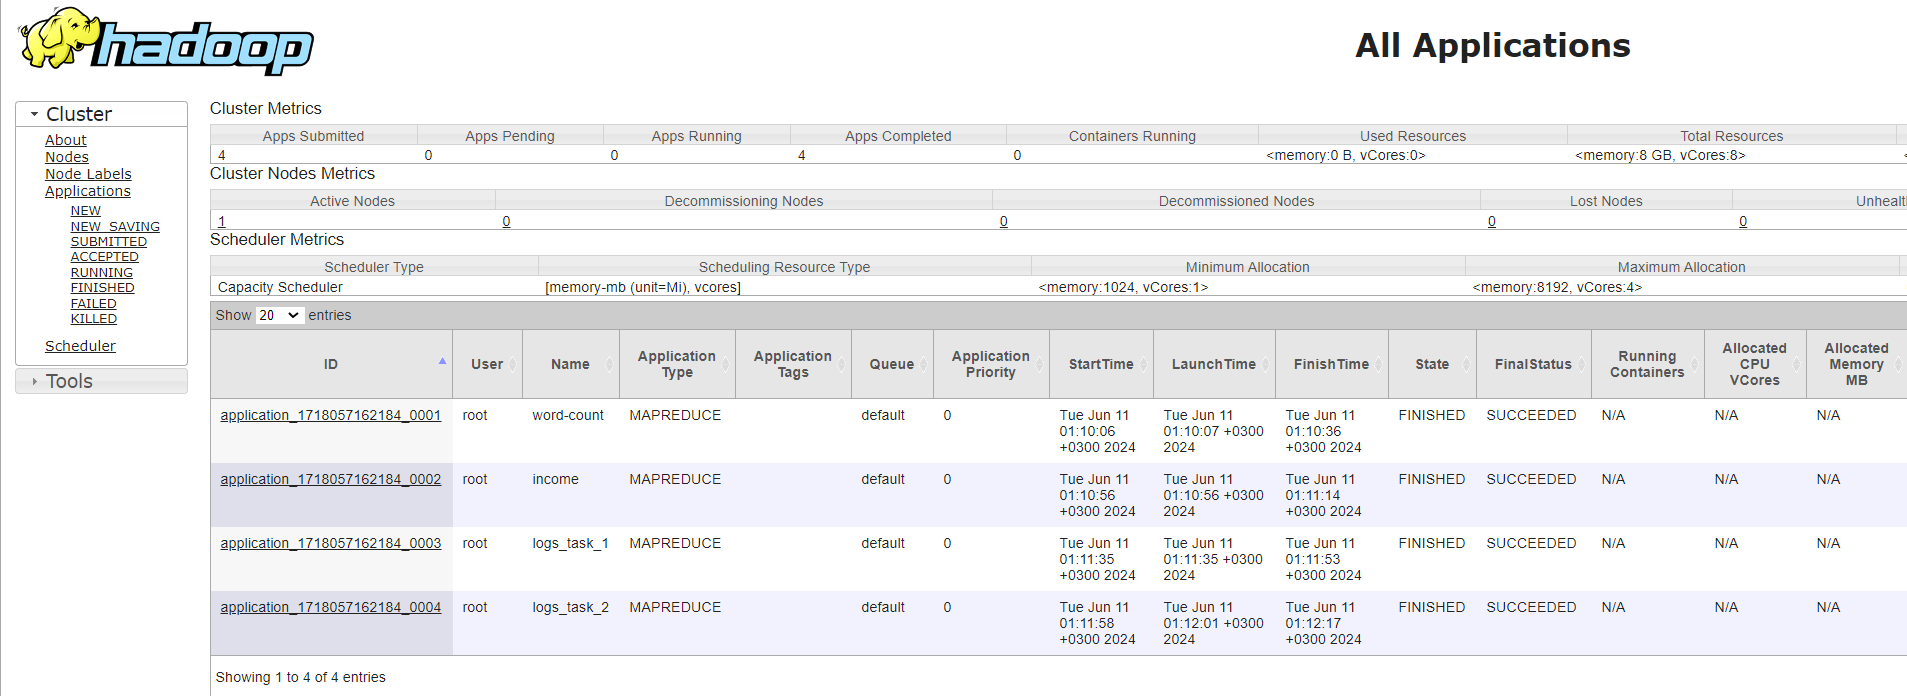